# Deep Learning

## Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

2024-04-04 19:29:29.665566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 19:29:29.665650: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 19:29:29.666990: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-04 19:29:29.674651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-04 19:29:30.759577: W ten

In [2]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = "10053308-100b-4249-a638-ec23b4df4138.jpg"
img = load_img(f'{path}/{name}', target_size=(299,299))

In [5]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7FEAD6108D60>


In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

In [7]:
x.dtype

dtype('uint8')

## Pre-trained convolutional neural networks

In [5]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299 ,299, 3))

2024-02-15 20:00:26.245828: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 20:00:26.392805: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 20:00:26.392847: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 20:00:26.395617: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-15 20:00:26.395719: I external/local_xla/xla/stream_executor

In [10]:
X = np.array([x])
X = preprocess_input(X)

In [11]:
np.shape(X)

(1, 299, 299, 3)

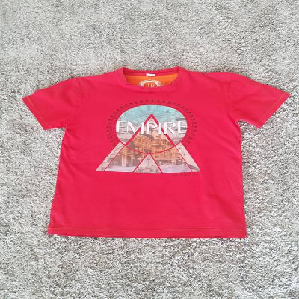

In [12]:
img

In [13]:
pred = model.predict(X)

2024-02-15 20:00:31.476614: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


1/1 [==============================] - 5s 5s/step


In [20]:
pred[0,:10]

array([8.86791440e-06, 1.33468657e-05, 1.11713525e-05, 7.24550137e-06,
       3.17887934e-05, 7.48154616e-06, 2.39036472e-05, 1.15312587e-05,
       1.71842457e-05, 1.23273167e-05], dtype=float32)

In [21]:
pred.shape

(1, 1000)

In [22]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.97110397),
  ('n03710637', 'maillot', 0.0066445903),
  ('n04370456', 'sweatshirt', 0.00054853904),
  ('n03877472', 'pajama', 0.00053686585),
  ('n04532106', 'vestment', 0.00028699113)]]

## Convolution neural network (CNN)

## Transfer learning

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train/', 
    target_size=(150,150), 
    batch_size=32,
    seed=42
)

Found 3068 images belonging to 10 classes.


In [25]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [26]:
X, y = next(train_ds)

In [27]:
X.shape, y.shape

((32, 150, 150, 3), (32, 10))

In [28]:
y[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [29]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
vaL_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/test/', 
    target_size=(150,150), 
    batch_size=32, 
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [30]:
import pickle

def save_var(var, file: str):
    with open(file, 'wb') as f:
        pickle.dump(var, f)

In [26]:
base_model = Xception(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150 ,150, 3))

base_model.trainable = False

base_model.training = False


inputs = keras.Input(shape=(150,150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)

# outputs = keras.layers.Dense(10, activation='softmax')(vectors)
outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

from tqdm.auto import tqdm
``` python
i=0
for layer in tqdm(base_model.layers, total=len(base_model.layers)):
    if i > 0 and layer.__class__.__name__ == 'Conv2D':
        save_var(layer.get_weights(), f"vars/base_layers/{i}-{layer.name}")
    i += 1
```

In [27]:
layers = base_model.layers

In [28]:
l = layers[2]
l.__class__

keras.src.layers.normalization.batch_normalization.BatchNormalization

In [29]:
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]

``` python
for i, layer in enumerate(layers):
    layer_type = layer.__class__.__name__
    if layer_type == 'Conv2D':
        print(f"{i}: {layer.name}\t|\t{layer_type}\t|\t{layer.input_shape}\t-->\t{layer.kernel_size, l.strides}\t-->\t{layer.output_shape}\t|\tTrainable: {layer.trainable}")
    elif layer_type == 'Activation':
        print(f"{i}: {layer.name}\t|\t{layer_type}\t|\t{layer.input_shape}\t-->\t{l.activation.__name__}\t-->\t{layer.output_shape}\t|\tTrainable: {layer.trainable}")
    elif layer_type == 'BatchNormalization':
        print(f"{i}: {layer.name}\t|\t{layer_type}\t|\t{layer.input_shape}\t-->\t\t-->\t{layer.output_shape}\t|\tTrainable: {layer.trainable}")
    else:
        print(f"Layer {i}: {layer.name}, Type: {layer_type}, Trainable: {layer.trainable}")
```

In [30]:
### Xception layer only
model_xc = keras.Model(inputs, base)
preds = model_xc(X)
save_var(preds, 'vars/model_xc_preds.txt')
preds.shape

TensorShape([32, 5, 5, 2048])

In [31]:
### Averaging to vector
model_avg = keras.Model(inputs, vectors)
preds = model_avg(X)
preds.shape

TensorShape([32, 2048])

In [34]:
preds = model.predict(X)

1/1 [==============================] - 0s 20ms/step


In [35]:
preds[0]

array([ 0.12404788, -0.19030952,  0.90132755, -0.18552957, -0.8759947 ,
        0.7649237 ,  0.31994322,  0.7701681 , -0.45544255, -0.1135312 ],
      dtype=float32)

In [36]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [37]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [38]:
history = model.fit(train_ds, epochs=10, validation_data=vaL_ds)

Epoch 1/10
 1/97 [..............................] - ETA: 2:59 - loss: 2.4491 - accuracy: 0.1562

2024-02-13 07:32:37.294851: I external/local_xla/xla/service/service.cc:168] XLA service 0x560ad2fc0740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-13 07:32:37.294882: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-02-13 07:32:37.305733: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1707789757.386063    4658 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


97/97 [==============================] - 16s 151ms/step - loss: 1.2954 - accuracy: 0.6616 - val_loss: 0.9459 - val_accuracy: 0.7285
Epoch 2/10
97/97 [==============================] - 13s 135ms/step - loss: 0.5327 - accuracy: 0.8298 - val_loss: 1.0576 - val_accuracy: 0.7392
Epoch 3/10
97/97 [==============================] - 13s 133ms/step - loss: 0.3313 - accuracy: 0.8749 - val_loss: 0.9238 - val_accuracy: 0.7527
Epoch 4/10
97/97 [==============================] - 13s 133ms/step - loss: 0.2407 - accuracy: 0.9118 - val_loss: 0.7308 - val_accuracy: 0.7823
Epoch 5/10
97/97 [==============================] - 13s 134ms/step - loss: 0.1372 - accuracy: 0.9511 - val_loss: 0.7819 - val_accuracy: 0.7984
Epoch 6/10
97/97 [==============================] - 13s 136ms/step - loss: 0.1014 - accuracy: 0.9673 - val_loss: 0.9845 - val_accuracy: 0.7608
Epoch 7/10
97/97 [==============================] - 14s 140ms/step - loss: 0.0624 - accuracy: 0.9822 - val_loss: 0.7544 - val_accuracy: 0.8253
Epoch 8/10

<Axes: title={'center': 'Losses'}>

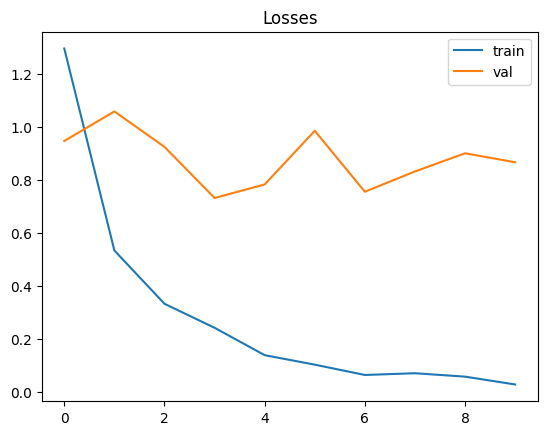

In [39]:
plt.title("Losses")
sns.lineplot(x=history.epoch, y=history.history['loss'], label="train")
sns.lineplot(x=history.epoch, y=history.history['val_loss'], label="val")

<Axes: title={'center': 'Accuracy'}>

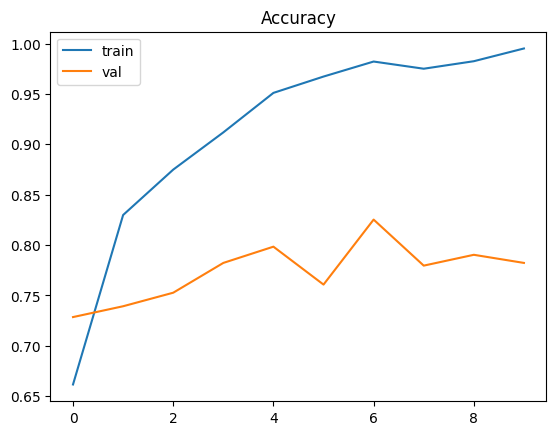

In [40]:
plt.title("Accuracy")
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label="train")
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label="val")

In [42]:
pred = history.model.predict(X)

1/1 [==============================] - 0s 25ms/step


In [43]:
for i in range(10):
    print(pred[i].argmax(), y[i].argmax(), pred[i].argmax() == y[i].argmax())

5 5 True
9 9 True
6 6 True
2 2 True
5 5 True
2 2 True
1 1 True
5 5 True
9 9 True
2 2 True


## Learning rate

In [44]:
def make_model(learning_rate: float):
    base_model = Xception(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150 ,150, 3))

    base_model.trainable = False
    base_model.training = False

    ######################

    inputs = keras.Input(shape=(150,150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    # outputs = keras.layers.Dense(10, activation='softmax')(vectors)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)
    
    ######################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [79]:
scores = {}
lrs = [0.0001, 0.001, 0.01, 0.1]
for lr in tqdm(lrs, total=len(lrs)):
    print(f"Model for lerning rate: {lr}")
    model = make_model(lr)
    history = model.fit(train_ds, epochs=10, validation_data=vaL_ds)
    scores[lr] = history.history

    print()
    print()

  0%|          | 0/4 [00:00<?, ?it/s]

Model for lerning rate: 0.0001
Epoch 1/10
97/97 [==============================] - 47s 462ms/step - loss: 1.9471 - accuracy: 0.3611 - val_loss: 1.5450 - val_accuracy: 0.4677
Epoch 2/10
97/97 [==============================] - 39s 400ms/step - loss: 1.4019 - accuracy: 0.5647 - val_loss: 1.2031 - val_accuracy: 0.5672
Epoch 3/10
97/97 [==============================] - 40s 410ms/step - loss: 1.1522 - accuracy: 0.6486 - val_loss: 1.0347 - val_accuracy: 0.6210
Epoch 4/10
97/97 [==============================] - 38s 396ms/step - loss: 1.0115 - accuracy: 0.6882 - val_loss: 0.9185 - val_accuracy: 0.6962
Epoch 5/10
97/97 [==============================] - 41s 420ms/step - loss: 0.9167 - accuracy: 0.7177 - val_loss: 0.8731 - val_accuracy: 0.6935
Epoch 6/10
97/97 [==============================] - 41s 426ms/step - loss: 0.8466 - accuracy: 0.7313 - val_loss: 0.8099 - val_accuracy: 0.7285
Epoch 7/10
97/97 [==============================] - 41s 419ms/step - loss: 0.7953 - accuracy: 0.7459 - val_loss

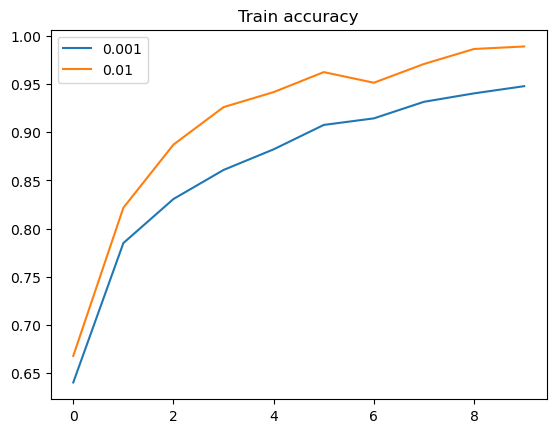

In [95]:
for lr in [0.001, 0.01]:
    plt.title("Train accuracy")
    sns.lineplot(scores[lr]['accuracy'], label=str(lr))

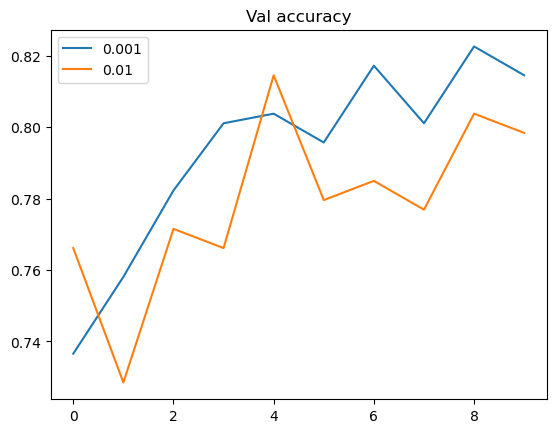

In [97]:
for lr in [0.001, 0.01]:
    plt.title("Val accuracy")
    sns.lineplot(scores[lr]['val_accuracy'], label=str(lr))

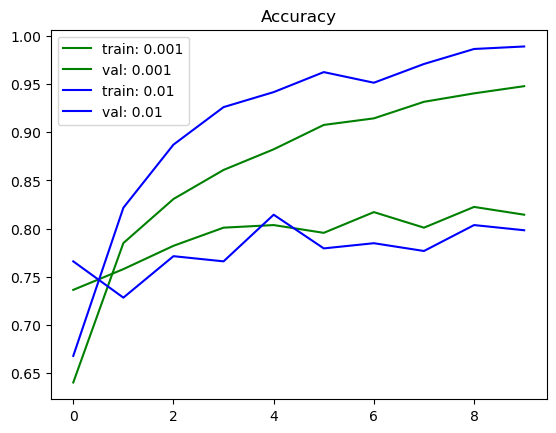

In [94]:
colors = {0.001: "green", 0.01: "blue"}
for lr in [0.001, 0.01]:
    plt.title("Accuracy")
    sns.lineplot(scores[lr]['accuracy'], label="train: " + str(lr), color=colors[lr])
    sns.lineplot(scores[lr]['val_accuracy'], label="val: " + str(lr), color=colors[lr])

In [91]:
final_learning_rate = 0.001

## Checkpointing

In [99]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "models/xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [100]:
final_learning_rate = 0.001
model = make_model(final_learning_rate)
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=vaL_ds,
                    callbacks=[checkpoint]
                    )

Epoch 1/10
97/97 [==============================] - 48s 465ms/step - loss: 1.0977 - accuracy: 0.6250 - val_loss: 0.6806 - val_accuracy: 0.7634
Epoch 2/10
97/97 [==============================] - 43s 446ms/step - loss: 0.6340 - accuracy: 0.7796 - val_loss: 0.5960 - val_accuracy: 0.7903
Epoch 3/10
97/97 [==============================] - 43s 445ms/step - loss: 0.5132 - accuracy: 0.8279 - val_loss: 0.5837 - val_accuracy: 0.7715
Epoch 4/10
97/97 [==============================] - 44s 449ms/step - loss: 0.4251 - accuracy: 0.8645 - val_loss: 0.5688 - val_accuracy: 0.7823
Epoch 5/10
97/97 [==============================] - 44s 448ms/step - loss: 0.3767 - accuracy: 0.8814 - val_loss: 0.5316 - val_accuracy: 0.8145
Epoch 6/10
97/97 [==============================] - 45s 460ms/step - loss: 0.3247 - accuracy: 0.9063 - val_loss: 0.5410 - val_accuracy: 0.8038
Epoch 7/10
97/97 [==============================] - 45s 465ms/step - loss: 0.2906 - accuracy: 0.9216 - val_loss: 0.5164 - val_accuracy: 0.8038

## Adding more layers

In [45]:
def make_model_with_inner_layer(learning_rate: float, inner_layer_size: int=100):
    base_model = Xception(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150 ,150, 3))

    base_model.trainable = False
    base_model.training = False

    ######################

    inputs = keras.Input(shape=(150,150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(inner_layer_size, activation='relu')(vectors)
    outputs = keras.layers.Dense(10)(inner)
    model = keras.Model(inputs, outputs)
    
    ######################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [46]:
final_learning_rate = 0.001

scores = {}
ilss = [10,100, 1000]
for ils in tqdm(ilss, total=len(ilss)):
    print(f"Model for inner layer size: {ils}")
    model = make_model_with_inner_layer(final_learning_rate, ils)
    history = model.fit(train_ds, epochs=10, validation_data=vaL_ds)
    scores[ils] = history.history

    print()
    print()

  0%|          | 0/3 [00:00<?, ?it/s]

Model for inner layer size: 10
Epoch 1/10
97/97 [==============================] - 15s 135ms/step - loss: 1.5913 - accuracy: 0.3984 - val_loss: 1.1770 - val_accuracy: 0.5645
Epoch 2/10
97/97 [==============================] - 13s 130ms/step - loss: 0.9817 - accuracy: 0.6716 - val_loss: 0.8766 - val_accuracy: 0.6586
Epoch 3/10
97/97 [==============================] - 13s 134ms/step - loss: 0.7410 - accuracy: 0.7566 - val_loss: 0.7805 - val_accuracy: 0.7016
Epoch 4/10
97/97 [==============================] - 13s 129ms/step - loss: 0.6284 - accuracy: 0.7971 - val_loss: 0.7933 - val_accuracy: 0.7043
Epoch 5/10
97/97 [==============================] - 13s 133ms/step - loss: 0.5593 - accuracy: 0.8214 - val_loss: 0.7083 - val_accuracy: 0.7177
Epoch 6/10
97/97 [==============================] - 12s 128ms/step - loss: 0.4997 - accuracy: 0.8425 - val_loss: 0.7277 - val_accuracy: 0.7151
Epoch 7/10
97/97 [==============================] - 12s 127ms/step - loss: 0.4594 - accuracy: 0.8515 - val_loss

 33%|███▎      | 1/3 [02:17<04:34, 137.42s/it]



Model for inner layer size: 100
Epoch 1/10
97/97 [==============================] - 17s 149ms/step - loss: 0.9568 - accuracy: 0.6681 - val_loss: 0.6473 - val_accuracy: 0.7688
Epoch 2/10
97/97 [==============================] - 13s 137ms/step - loss: 0.4996 - accuracy: 0.8311 - val_loss: 0.6428 - val_accuracy: 0.7608
Epoch 3/10
97/97 [==============================] - 15s 151ms/step - loss: 0.3431 - accuracy: 0.8843 - val_loss: 0.5623 - val_accuracy: 0.8172
Epoch 4/10
97/97 [==============================] - 14s 139ms/step - loss: 0.2423 - accuracy: 0.9267 - val_loss: 0.5314 - val_accuracy: 0.8118
Epoch 5/10
97/97 [==============================] - 14s 140ms/step - loss: 0.1746 - accuracy: 0.9520 - val_loss: 0.6097 - val_accuracy: 0.7876
Epoch 6/10
97/97 [==============================] - 14s 139ms/step - loss: 0.1293 - accuracy: 0.9702 - val_loss: 0.6442 - val_accuracy: 0.7903
Epoch 7/10
97/97 [==============================] - 17s 174ms/step - loss: 0.0981 - accuracy: 0.9802 - val_l

 67%|██████▋   | 2/3 [04:44<02:22, 142.95s/it]



Model for inner layer size: 1000
Epoch 1/10
97/97 [==============================] - 16s 145ms/step - loss: 0.9464 - accuracy: 0.6849 - val_loss: 0.5542 - val_accuracy: 0.7742
Epoch 2/10
97/97 [==============================] - 15s 152ms/step - loss: 0.4377 - accuracy: 0.8558 - val_loss: 0.5860 - val_accuracy: 0.8011
Epoch 3/10
97/97 [==============================] - 14s 141ms/step - loss: 0.2583 - accuracy: 0.9125 - val_loss: 0.6807 - val_accuracy: 0.7634
Epoch 4/10
97/97 [==============================] - 14s 143ms/step - loss: 0.1732 - accuracy: 0.9436 - val_loss: 0.6006 - val_accuracy: 0.8091
Epoch 5/10
97/97 [==============================] - 13s 139ms/step - loss: 0.0827 - accuracy: 0.9802 - val_loss: 0.6672 - val_accuracy: 0.7769
Epoch 6/10
97/97 [==============================] - 13s 137ms/step - loss: 0.0521 - accuracy: 0.9893 - val_loss: 0.5667 - val_accuracy: 0.8360
Epoch 7/10
97/97 [==============================] - 14s 139ms/step - loss: 0.0304 - accuracy: 0.9945 - val_

100%|██████████| 3/3 [07:06<00:00, 142.21s/it]

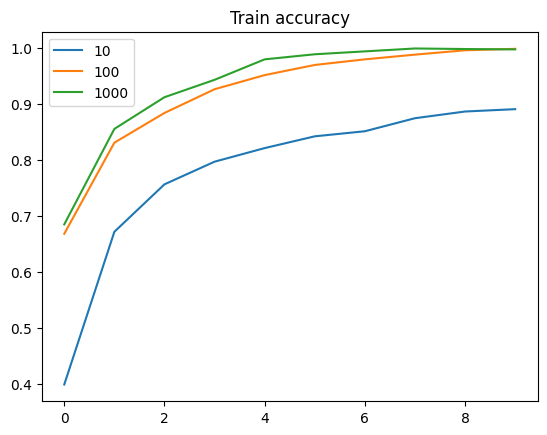

In [49]:
for ils in [10, 100, 1000]:
    plt.title("Train accuracy")
    sns.lineplot(scores[ils]['accuracy'], label=str(ils))

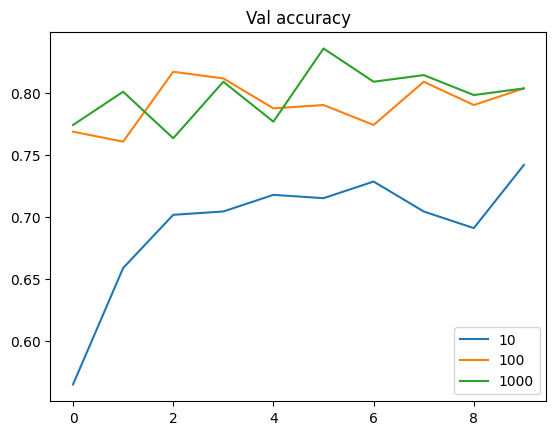

In [48]:
for ils in [10, 100, 1000]:
    plt.title("Val accuracy")
    sns.lineplot(scores[ils]['val_accuracy'], label=str(ils))

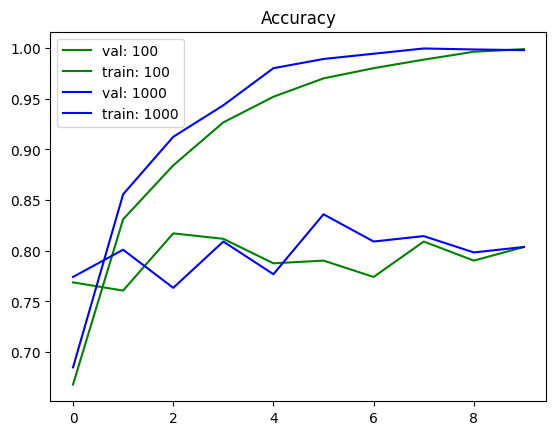

In [51]:
colors = {100: "green", 1000: "blue"}
for ils in [100, 1000]:
    plt.title("Accuracy")
    sns.lineplot(scores[ils]['val_accuracy'], label="val: " + str(ils), color=colors[ils])
    sns.lineplot(scores[ils]['accuracy'], label="train: " + str(ils), color=colors[ils])

In [59]:
i=2
(100, scores[100]['val_accuracy'][i], scores[100]['accuracy'][i]), (1000, scores[1000]['val_accuracy'][i],scores[1000]['accuracy'][i])

((100, 0.8172042965888977, 0.8842787742614746),
 (1000, 0.7634408473968506, 0.9124797582626343))

In [60]:
hidden_layer_size = 100

## Dropout and Regularization

In [34]:
def make_model_hidden_dropout(learning_rate: float, inner_layer_size: int=100, dropout=0.5):
    base_model = Xception(weights='imagenet', 
                 include_top=False, 
                 input_shape=(150 ,150, 3))

    base_model.trainable = False
    base_model.training = False

    ######################

    inputs = keras.Input(shape=(150,150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(inner_layer_size, activation='relu')(vectors)
    drop = keras.layers.Dropout(dropout)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ######################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [64]:
final_learning_rate = 0.001
hidden_layer_size = 100

scores = {}
drs = [0.0, 0.2, 0.5, 0.8]
for dr in tqdm(drs, total=len(drs)):
    print(f"Model for inner layer size: {dr}")
    model = make_model_hidden_dropout(final_learning_rate, hidden_layer_size, dr)
    history = model.fit(train_ds, epochs=30, validation_data=vaL_ds)
    scores[dr] = history.history

    print()
    print()

  0%|          | 0/4 [00:00<?, ?it/s]

Model for inner layer size: 0.0
Epoch 1/30
97/97 [==============================] - 16s 144ms/step - loss: 0.9377 - accuracy: 0.6739 - val_loss: 0.5933 - val_accuracy: 0.7930
Epoch 2/30
97/97 [==============================] - 13s 137ms/step - loss: 0.4882 - accuracy: 0.8298 - val_loss: 0.5745 - val_accuracy: 0.7661
Epoch 3/30
97/97 [==============================] - 13s 132ms/step - loss: 0.3472 - accuracy: 0.8859 - val_loss: 0.5453 - val_accuracy: 0.8011
Epoch 4/30
97/97 [==============================] - 13s 135ms/step - loss: 0.2445 - accuracy: 0.9271 - val_loss: 0.5702 - val_accuracy: 0.8038
Epoch 5/30
97/97 [==============================] - 13s 132ms/step - loss: 0.1749 - accuracy: 0.9549 - val_loss: 0.5646 - val_accuracy: 0.7876
Epoch 6/30
97/97 [==============================] - 13s 136ms/step - loss: 0.1225 - accuracy: 0.9747 - val_loss: 0.5646 - val_accuracy: 0.8011
Epoch 7/30
97/97 [==============================] - 14s 139ms/step - loss: 0.0975 - accuracy: 0.9809 - val_los

 25%|██▌       | 1/4 [06:42<20:07, 402.40s/it]



Model for inner layer size: 0.2
Epoch 1/30
97/97 [==============================] - 16s 138ms/step - loss: 1.0792 - accuracy: 0.6347 - val_loss: 0.7178 - val_accuracy: 0.7339
Epoch 2/30
97/97 [==============================] - 13s 134ms/step - loss: 0.6190 - accuracy: 0.7890 - val_loss: 0.6456 - val_accuracy: 0.7661
Epoch 3/30
97/97 [==============================] - 13s 134ms/step - loss: 0.4711 - accuracy: 0.8366 - val_loss: 0.5663 - val_accuracy: 0.8118
Epoch 4/30
97/97 [==============================] - 13s 135ms/step - loss: 0.3594 - accuracy: 0.8807 - val_loss: 0.5520 - val_accuracy: 0.8145
Epoch 5/30
97/97 [==============================] - 14s 142ms/step - loss: 0.2870 - accuracy: 0.9041 - val_loss: 0.6392 - val_accuracy: 0.7849
Epoch 6/30
97/97 [==============================] - 14s 140ms/step - loss: 0.2395 - accuracy: 0.9238 - val_loss: 0.6996 - val_accuracy: 0.7796
Epoch 7/30
97/97 [==============================] - 13s 135ms/step - loss: 0.1910 - accuracy: 0.9449 - val_l

 50%|█████     | 2/4 [13:29<13:30, 405.03s/it]



Model for inner layer size: 0.5
Epoch 1/30
97/97 [==============================] - 18s 166ms/step - loss: 1.2674 - accuracy: 0.5812 - val_loss: 0.7457 - val_accuracy: 0.7312
Epoch 2/30
97/97 [==============================] - 16s 166ms/step - loss: 0.8234 - accuracy: 0.7135 - val_loss: 0.6411 - val_accuracy: 0.7957
Epoch 3/30
97/97 [==============================] - 15s 159ms/step - loss: 0.6947 - accuracy: 0.7533 - val_loss: 0.6015 - val_accuracy: 0.7742
Epoch 4/30
97/97 [==============================] - 16s 163ms/step - loss: 0.5901 - accuracy: 0.7951 - val_loss: 0.6071 - val_accuracy: 0.7527
Epoch 5/30
97/97 [==============================] - 16s 161ms/step - loss: 0.4985 - accuracy: 0.8207 - val_loss: 0.5840 - val_accuracy: 0.7957
Epoch 6/30
97/97 [==============================] - 14s 148ms/step - loss: 0.4632 - accuracy: 0.8376 - val_loss: 0.5446 - val_accuracy: 0.7957
Epoch 7/30
97/97 [==============================] - 13s 136ms/step - loss: 0.4082 - accuracy: 0.8587 - val_l

 75%|███████▌  | 3/4 [20:23<06:49, 409.18s/it]



Model for inner layer size: 0.8
Epoch 1/30
97/97 [==============================] - 15s 139ms/step - loss: 1.8045 - accuracy: 0.4023 - val_loss: 1.1290 - val_accuracy: 0.6075
Epoch 2/30
97/97 [==============================] - 13s 132ms/step - loss: 1.4303 - accuracy: 0.5102 - val_loss: 0.9520 - val_accuracy: 0.6425
Epoch 3/30
97/97 [==============================] - 13s 128ms/step - loss: 1.2967 - accuracy: 0.5472 - val_loss: 0.8679 - val_accuracy: 0.6694
Epoch 4/30
97/97 [==============================] - 13s 133ms/step - loss: 1.2065 - accuracy: 0.5689 - val_loss: 0.8136 - val_accuracy: 0.7016
Epoch 5/30
97/97 [==============================] - 13s 135ms/step - loss: 1.1299 - accuracy: 0.5964 - val_loss: 0.7805 - val_accuracy: 0.7231
Epoch 6/30
97/97 [==============================] - 13s 129ms/step - loss: 1.1020 - accuracy: 0.6065 - val_loss: 0.7730 - val_accuracy: 0.7124
Epoch 7/30
97/97 [==============================] - 14s 143ms/step - loss: 1.0799 - accuracy: 0.6120 - val_l

100%|██████████| 4/4 [27:15<00:00, 408.98s/it]

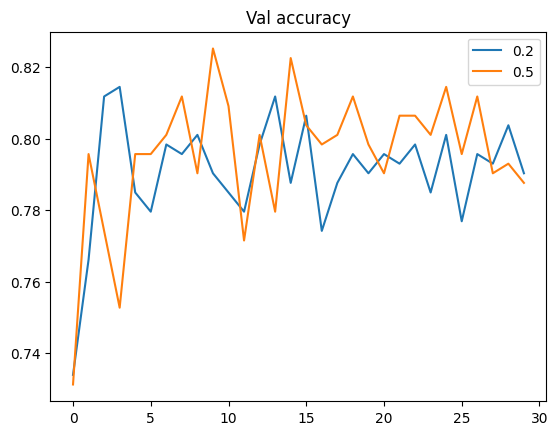

In [71]:
for d in [0.2, 0.5]:
    plt.title("Val accuracy")
    sns.lineplot(scores[d]['val_accuracy'], label=str(d))

<Axes: title={'center': 'Accuracy'}>

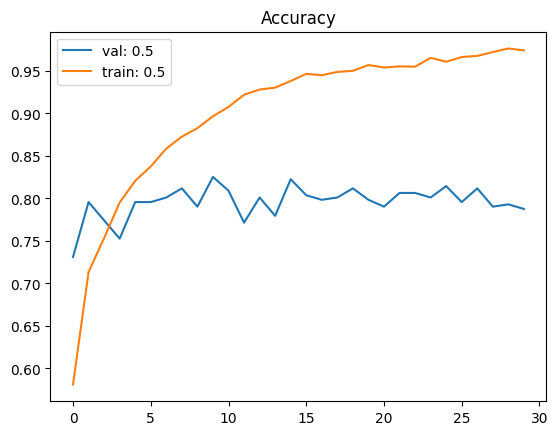

In [83]:
d = 0.5
plt.title("Accuracy")
sns.lineplot(scores[d]['val_accuracy'], label="val: "+ str(d))
sns.lineplot(scores[d]['accuracy'], label="train: "+ str(d))

In [79]:
d = 0.5
i=np.argmax(scores[d]['val_accuracy'])
d, i, scores[d]['val_accuracy'][i], scores[d]['accuracy'][i]

(0.5, 9, 0.8252688050270081, 0.8965964317321777)

In [80]:
d = 0.2
i=np.argmax(scores[d]['val_accuracy'])
d, i, scores[d]['val_accuracy'][i], scores[d]['accuracy'][i]

(0.2, 3, 0.8145161271095276, 0.8807131052017212)

In [82]:
final_dropout_ratio = 0.5

## Data augmentation

In [52]:
train_gen_aug = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=10.0, zoom_range=0.1, vertical_flip=True)
train_ds_aug = train_gen_aug.flow_from_directory(
    './clothing-dataset-small/train/', 
    target_size=(150,150), 
    batch_size=32,
    seed=42
)

val_gen_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds_aug = val_gen_aug.flow_from_directory(
    './clothing-dataset-small/test/', 
    target_size=(150,150), 
    batch_size=32, 
    shuffle=False
)

Found 3085 images belonging to 10 classes.
Found 372 images belonging to 10 classes.


In [53]:
final_learning_rate = 0.001
hidden_layer_size = 100
final_dropout_ratio = 0.5


model = make_model_hidden_dropout(final_learning_rate, hidden_layer_size, final_dropout_ratio)
history = model.fit(train_ds_aug, epochs=50, validation_data=val_ds_aug)


Epoch 1/50
97/97 [==============================] - 22s 211ms/step - loss: 1.5604 - accuracy: 0.4801 - val_loss: 0.9937 - val_accuracy: 0.6398
Epoch 2/50
97/97 [==============================] - 20s 208ms/step - loss: 1.1163 - accuracy: 0.6178 - val_loss: 0.8016 - val_accuracy: 0.6855
Epoch 3/50
97/97 [==============================] - 21s 218ms/step - loss: 1.0236 - accuracy: 0.6558 - val_loss: 0.7763 - val_accuracy: 0.7070
Epoch 4/50
97/97 [==============================] - 21s 220ms/step - loss: 0.9365 - accuracy: 0.6836 - val_loss: 0.7368 - val_accuracy: 0.7258
Epoch 5/50
97/97 [==============================] - 21s 216ms/step - loss: 0.9061 - accuracy: 0.6995 - val_loss: 0.7196 - val_accuracy: 0.7285
Epoch 6/50
97/97 [==============================] - 21s 220ms/step - loss: 0.8346 - accuracy: 0.7112 - val_loss: 0.6522 - val_accuracy: 0.7581
Epoch 7/50
97/97 [==============================] - 21s 212ms/step - loss: 0.8286 - accuracy: 0.7254 - val_loss: 0.6788 - val_accuracy: 0.7392

<Axes: title={'center': 'Accuracy'}>

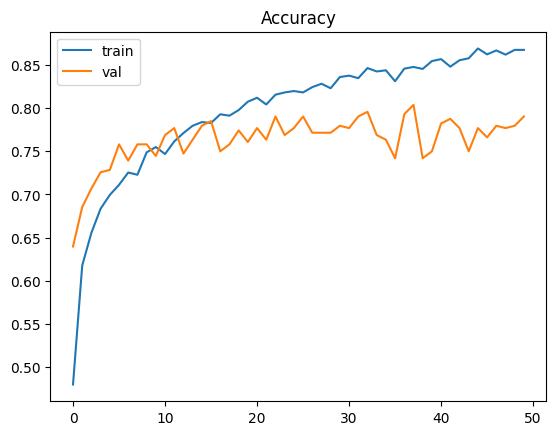

In [54]:
plt.title("Accuracy")
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label="train")
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label="val")

<Axes: >

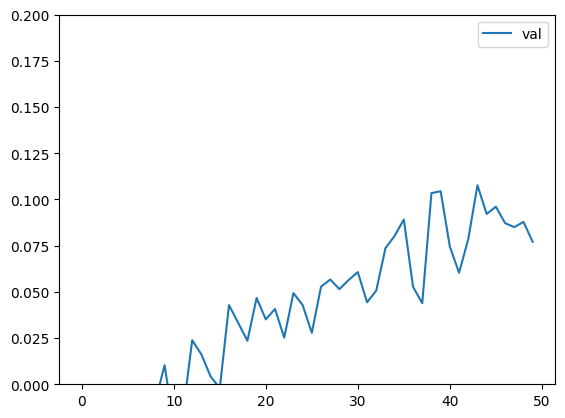

In [55]:
plt.ylim((0, .2))
sns.lineplot(x=history.epoch, y=np.subtract(history.history['accuracy'], history.history['val_accuracy']), label="val")

In [56]:
i=np.argmax(history.history['val_accuracy'])
i, history.history['val_accuracy'][i], history.history['accuracy'][i]

(37, 0.8037634491920471, 0.8476499319076538)

## Training with a larger model

In [57]:
def make_large_model(input_size, learning_rate: float, inner_layer_size: int=100, dropout=0.5):
    base_model = Xception(weights='imagenet', 
                 include_top=False, 
                 input_shape=(input_size ,input_size, 3))

    base_model.trainable = False
    base_model.training = False

    ######################

    inputs = keras.Input(shape=(input_size,input_size, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(inner_layer_size, activation='relu')(vectors)
    drop = keras.layers.Dropout(dropout)(inner)
    outputs = keras.layers.Dense(10)(drop)
    model = keras.Model(inputs, outputs)
    
    ######################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [58]:
train_gen_aug = ImageDataGenerator(preprocessing_function=preprocess_input, shear_range=10.0, zoom_range=0.1, vertical_flip=True)
train_ds_aug = train_gen_aug.flow_from_directory(
    './clothing-dataset-small/train/', 
    target_size=(299,299), 
    batch_size=32,
    seed=42
)

val_gen_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds_aug = val_gen_aug.flow_from_directory(
    './clothing-dataset-small/test/', 
    target_size=(299,299),
    batch_size=32, 
    shuffle=False
)

Found 3085 images belonging to 10 classes.
Found 372 images belonging to 10 classes.


In [69]:
final_learning_rate = 0.0005
hidden_layer_size = 100
final_dropout_ratio = 0.5
input_size = 299

checkpoint = keras.callbacks.ModelCheckpoint(
    "models/xception_v5_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

model = make_large_model(input_size, final_learning_rate, hidden_layer_size, final_dropout_ratio)
history = model.fit(train_ds_aug, epochs=50, validation_data=val_ds_aug, callbacks=checkpoint)


Epoch 1/50
97/97 [==============================] - ETA: 0s - loss: 1.4449 - accuracy: 0.5358

/home/bendu/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


97/97 [==============================] - 49s 476ms/step - loss: 1.4449 - accuracy: 0.5358 - val_loss: 0.7109 - val_accuracy: 0.7930
Epoch 2/50
97/97 [==============================] - 44s 455ms/step - loss: 0.9432 - accuracy: 0.7015 - val_loss: 0.5191 - val_accuracy: 0.8495
Epoch 3/50
97/97 [==============================] - 46s 476ms/step - loss: 0.7866 - accuracy: 0.7485 - val_loss: 0.4499 - val_accuracy: 0.8575
Epoch 4/50
97/97 [==============================] - 45s 461ms/step - loss: 0.7145 - accuracy: 0.7673 - val_loss: 0.4242 - val_accuracy: 0.8575
Epoch 5/50
97/97 [==============================] - 45s 458ms/step - loss: 0.6520 - accuracy: 0.7854 - val_loss: 0.3685 - val_accuracy: 0.8548
Epoch 6/50
97/97 [==============================] - 48s 488ms/step - loss: 0.6413 - accuracy: 0.7854 - val_loss: 0.3896 - val_accuracy: 0.8683
Epoch 7/50
97/97 [==============================] - 46s 467ms/step - loss: 0.5986 - accuracy: 0.8003 - val_loss: 0.3897 - val_accuracy: 0.8737
Epoch 8/50

<Axes: title={'center': 'Accuracy'}>

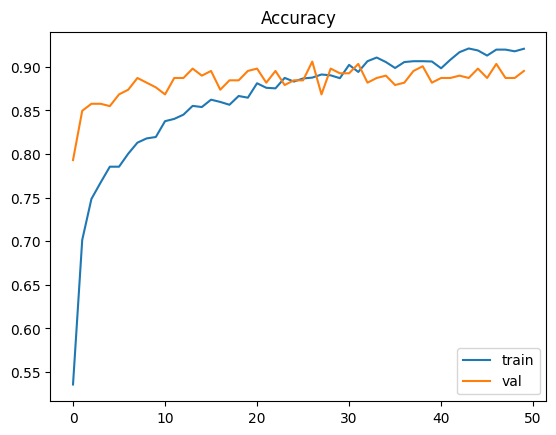

In [70]:
plt.title("Accuracy")
sns.lineplot(x=history.epoch, y=history.history['accuracy'], label="train")
sns.lineplot(x=history.epoch, y=history.history['val_accuracy'], label="val")

In [71]:
i=np.argmax(history.history['val_accuracy'])
i, history.history['val_accuracy'][i], history.history['accuracy'][i]

(26, 0.9059139490127563, 0.8875202536582947)

## Test data validation

In [5]:
test_gen_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds_aug = test_gen_aug.flow_from_directory(
    './clothing-dataset-small/validation/', 
    target_size=(299,299),
    batch_size=32, 
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [9]:
model_loaded = keras.models.load_model('models/xception_v5_27_0.906.h5')
model_loaded.evaluate(test_ds_aug)

11/11 [==============================] - 3s 229ms/step - loss: 0.3829 - accuracy: 0.8651


[0.382915735244751, 0.8651026487350464]

In [10]:
model_loaded = keras.models.load_model('models/xception_v4_23_0.911.h5')
model_loaded.evaluate(test_ds_aug)

11/11 [==============================] - 3s 230ms/step - loss: 0.4006 - accuracy: 0.8710


[0.4006114602088928, 0.8709677457809448]